# Métodos Computacionales

## Unidad 1: 

### Teoría de errores

- Errores inherentes.
- Errores de método.
- Errores computacionales.

##  Teoría de errores en computación

Al aplicar algún método numérico se realizan muchas operaciones aritméticas elementales lo cual
al hacerlas se producen errores, errores que pueden influir en la solución de algún problema, podemos
clasificar a los errores básicamente en tres tipos, donde el principal almenos en este curso serán los errores correspondientes a la computación



### Errores inherentes
 
El error inherente se produce por criterio de incertidumbre, esto es intrínseco a cualquier
sistema (natural o artificial) dado que es imposible considerar todas las variables que definen un
sistema. Especialmente en física o astronomía estamos acostumbrados a tratar con este tipo de errores, un ejemplo de esto es cuando despreciamos la fricción en un movimiento de caida libre o un péndulo. 

![image.png](attachment:image.png)
 


### Errores de método.

Si un sistema esta representado por un modelo matemático, el método que se utilice para encontrar
la solución nos dará como resultado una solución sin error o con error. Esto dependerá de varios factores, por ejemplo: 

- Si la solución es analítica se podrá llegar a una solución sin error de método.
- Si la solución es numérica su puede tener errores de truncamiento.

     Se recurre a la solución numérica cuando: 
     - El método analítico es muy difícil.
     - No hay solución analítica. 


Sea $S_m$ la solución de método y sea $E_m$ el error de método,
Donde:

![image.png](attachment:image.png)

donde numéricamente debemos limitar la serie infinita truncando los términos $S_m=\sum_{i=1}^n{S_i}$  y  $S_n=\sum_{k=n+1}^\infty{S_k}$ , a dicho truncamiento se le conoce como Error de Método ($E_m$).

Podemos conocer la forma de la solución de $S_h$, si proponemos una función $f(x)$ como solución del
método matemático, si además proponemos a $f(x)$ como una función elemental (polinomio, es decir, 
$$f(x)=\sum_{i=0}^\infty{a_ix^i}$$

donde decimos que la solución es valida para un valor cercano alrededor de una constante **c**
$$f(x)=\sum_{i=0}^\infty{a_i{(x-c)}^i}$$

Expandiendo la serie y derivando para encontrar el valor de $a_i$ tenemos la serie de Taylor 

$$f(x_{i+1})=f(x_i)+\frac{f'(x_i)h}{1!}+\frac{f''(x_i)h^2}{2!}+\frac{f'''(x_i)h^3}{3!}+...+\frac{f^n(x_i)h^n}{n!}+...+R_n$$ 

donde $R_n$ es el error residual o error de metodo y es:
$$R_n=\frac{f^{n+1}(x_i)h^{n+1}}{(n+1)!}$$

Note que si el   $\lim_{n\to\infty}R_n(x)=0$ la solución es exacta.

### <span style="color:red">Ejercicio ejemplo</span>

Haga un análisis del error de truncamiento mediante la función seno, expandiendo en series de taylor. 

$$sen(x)= x- \frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\frac{x^9}{9!}+\frac{x^{11}}{11!}+\frac{x^{13}}{13!}+\frac{x^{15}}{15!}+ O(9)$$

$$\sin x = \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)!} $$

In [1]:
import numpy as np

def mysin(x,orden):
    ordn=[]
    mysn=[]
    y=0
    
    for i in range(0,orden,1):
        y+=((-1)**i)*(x**(2*i+1))/np.math.factorial(1+2*i)
        ordn.append(i)
        mysn.append(y)
    return(y)
    

In [2]:
mysin(np.pi/6,50)

0.49999999999999994

In [3]:
mysin(np.pi/6,10)

0.49999999999999994

In [4]:
mysin(np.pi/6,5)

0.5000000000202799

In [5]:
mysin(np.pi/6,1)

0.5235987755982988

In [6]:
vmysin=np.vectorize(mysin,excluded=['orden'])

In [7]:
vmysin([0,1,np.pi,np.pi/6],7)

array([0.00000000e+00, 8.41470985e-01, 2.11425676e-05, 5.00000000e-01])

In [8]:
x=np.linspace(-4*np.pi,4*np.pi,500)

In [9]:
y2=vmysin(x,2)
y3=vmysin(x,3)
y4=vmysin(x,4)
y5=vmysin(x,5)
y6=vmysin(x,6)
y7=vmysin(x,7)
y8=vmysin(x,8)

y=np.sin(x) # orden 50

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(x,y, label='sin(x)')
plt.plot(x,y2, label='orden 2')
plt.plot(x,y3, label='orden 3')
plt.plot(x,y4, label='orden 4')
plt.plot(x,y5, label='orden 5')
plt.plot(x,y6, label='orden 6')
plt.plot(x,y7, label='orden 7')
plt.plot(x,y8, label='orden 8')

plt.xlabel('x:ángulo radianes')
plt.ylabel('sin(x)')

plt.ylim([-5,5])
plt.legend()
plt.savefig('plot_sin.png')

plt.show()

<Figure size 1200x800 with 1 Axes>

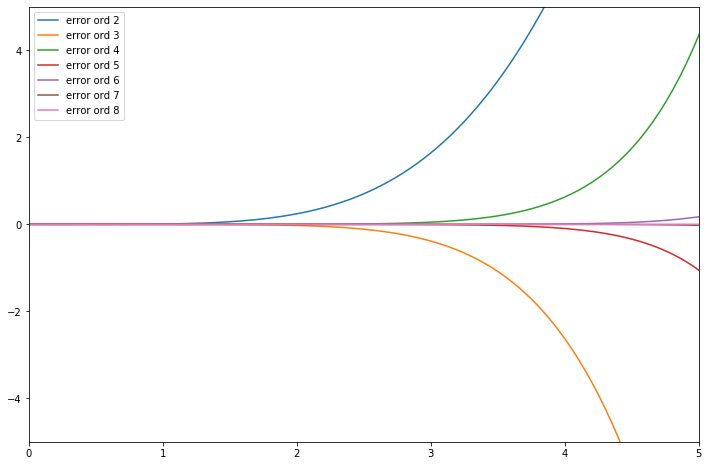

In [11]:
plt.figure(figsize=(12,8))

plt.plot(x,y-y2, label='error ord 2')
plt.plot(x,y-y3, label='error ord 3')
plt.plot(x,y-y4, label='error ord 4')
plt.plot(x,y-y5, label='error ord 5')
plt.plot(x,y-y6, label='error ord 6')
plt.plot(x,y-y7, label='error ord 7')
plt.plot(x,y-y8, label='error ord 8')

plt.xlim([0,5])
plt.ylim([-5,5])

plt.legend()
plt.show()

### Errores computacionales

Si se implementa el método de solución en computadora, se sujetara a las características físicas de
ella, por lo cual podemos tener:

- Errores de desborde
- Errores de redondeo
- Errores acumulables

Además considerando todos los errores trabajados la solución final será:  

![image.png](attachment:image.png)


### Estructura de datos

La unidad básica de información en una computadora digital es llamada bit (por binary digit) , la cuál consiste en un sólo carácter 0 ó 1. En 1964, desarrolladores trabajando para IBM establecieron la convención de llamar byte a grupos de 8 bits.

Las computadoras personales modernas (ej. x86, x86-64, etc) usan palabras de tamaño 32 y 64 bits (4 y 8 bytes respectivamente). Le representación de un número en memoria **int(n)** en memoria es de la siguiente forma:



- Si **n** es un entero positivo, entonces su representación es el número en notación binaria con los ceros a la izquierda que sean necesarios para completar los 32 (ó 64) bits.

- Si n es un entero negativo, entonces su representación es su complemento a dos.
    - El complemento a dos se define como el número $\alpha$ tal que  $2^{32}=n+\alpha$
    - Si n es negativo, el complemento a dos es:
        $$\alpha=2^{32}-|n|$$
        ej: n=2 en binario n=010 su complemento a dos es invertir los bits y sumar uno, así n=110=-2
        
        101+1=110

- La notación científica (base 10) de un numero real define como $m×10^c$, donde: $m$ es la mantiza y $c$ la magnitud. El estándar IEEE-754 (IEEE Standard for Floating-Point Arithmetic) se estableció en 1985 y e índica un formato ampliamente usado para representar números de punto flotante en memoria.

    - En particular, para binary32:
![image.png](attachment:image.png)


### Error de desborde

Estos errores se dan si cualquier número manejado teóricamente cae fuera de los rangos definidos
en la computadora.Es decir:

- Si se manejan numeros mayores a los que se puede representar. 
- Si se manejan numeros menores a los que se puede representar.

Ejemplo:

    -  Enteros signados = [$-2^{31} , 2^{31}-1$] Para 32 bits
    -  Enteros sin signo = [$ 0 , 2^{32}-1 $]
    
    Ejemplo: https://ai.googleblog.com/2006/06/extra-extra-read-all-about-it-nearly.html

### Errores de redondeo 

Sea el criterio que en los reales matemáticos existe un numero infinito de intervalos entre un
intervalo definido.

![image.png](attachment:image.png)



En computación siempre va a haber un intervalo finito posible por las características físicas de
la computadora.

![image.png](attachment:image.png)


Al intervalo más pequeño $\epsilon_m$ manejado por la computadora se le llama épsilon de la maquina, esto es el número mínimo distinguible. Así todo numero que este en el intervalo ( 0 ,$\epsilon_m$) no se puede manejar en la computadora.

Por lo tanto cuando ka computadora tiene que manejar un número perteneciente a este intervalo,realiza un criterio de redondeo hacia abajo o hacia arriba del número mas distinguible cercano.

### Errores acomulables

En las operaciones básicas se tiene un error de redondeo, en operaciones iterativas el error de
redondeo se acumula en la proporción de la operación.

$S_{c_1}=S_1+E_1$

$S_{c_2}=S_{c_1}+E_2$

$S_{c_3}=S_3+E_3$

Así al final $\sum_{i=1}^n{S_{c=1}}=\sum_{i=1}^n{S_{i}}+ \sum_{i=1}^n{E_{i}}$


### <span style="color:red">Ejercicio ejemplo</span>

Realice un problema donde evidencie cada uno de los errores computacionales:

A.Realice un ejemplo de desbordamiento. 

B.Encuentre el eps de la maquina y sume y reste numeros alrededor de este valor.

C. Realice las siguientes operaciones en python:
a=4/3
b=a-1
c=b+b+b
e=1-c

In [12]:
import numpy as np
np.finfo(float)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [13]:
print(np.finfo(0.0).eps)

2.220446049250313e-16


In [14]:
(2.220446049250313e-16)+1

1.0000000000000002

In [15]:
-1.7976931348623157e+309

-inf

In [16]:
a=4/3

In [22]:
b=a-1 # b=1/3
b

0.33333333333333326

In [23]:
c=b+b+b # b=1
c

0.9999999999999998

In [24]:
e=1-c # e=0
e

2.220446049250313e-16

In [25]:
e*1e14


0.02220446049250313

## REFERENCIAS.
[1] http://www.robcas64.com/Numerico/Errores/SepErr.pdf

[2] https://es.wikipedia.org/wiki/Coma_flotante#:~:text=Sistema%20binario,-Art%C3%ADculo%20principal%3A%20Sistema&text=En%20la%20representaci%C3%B3n%20binaria%20de,bits%20son%20la%20parte%20significativa.

[3] https://ai.googleblog.com/2006/06/extra-extra-read-all-about-it-nearly.html
 